# $\color{red}{\text{Data Preprocessing}}$

### Preprocesing on Q-Learning Weekly 2021 data. 

It must be formatted as below to use in Dynamic Pricing script

* SalesDWDateID	          [2012-01-06]
* DWHotelID	              [2.0]
* SalesID		          [515099.0]   
* ListPriceTRYUnit	      [115.500]
* PurchaseAmountTRYUnit	  [99.0000]	
* ProfitRate	          [0.166667]
* #rooms	              [17.0]
* RoomCount	              [2.0]
* type__Sehir Oteli	      [0.0]
* RatingTripA	          [4.1]
* catName	              [2.0]
* featureScore	          [1.078785]
* empty_rooms             [15.0]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#### $\color{red}{\text{General overview of data}}$

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/qlearning_weekly_2021_v3.csv")
print('Column Names=', list(df.columns)) 
df


Column Names= ['Unnamed: 0', 'w', 'SpecialWeek (w)', 'Date', 'DWHotelID', 'ListPriceTRY', 'PurchaseAmountTRY', 'Aktiviteler', 'Havuz & Plaj', 'Tesis Hizmet ve Özellikleri', 'Covid Önlemleri', 'ListPriceTRY_mean', 'Ortak Alanlar', 'Yiyecek & İçecek', 'Spa & Sağlık', 'Çocuk Aktiviteleri', 'NightCount_avg', 'RatingTripA', '#rooms', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Year', 'rooms_updated']


,Unnamed: 0,w,SpecialWeek (w),Date,DWHotelID,ListPriceTRY,PurchaseAmountTRY,Aktiviteler,Havuz & Plaj,Tesis Hizmet ve Özellikleri,...,2,3,4,5,6,7,8,9,Year,rooms_updated
0,0,10.0,1.0,2013-21,58.0,486.200000,407.300000,0.333333,0.371429,0.348837,...,-0.093517,-0.002331,0.146402,0.068045,0.036488,-0.005879,-0.002838,-0.003508,2013,379.0
1,1,12.0,0.0,2013-22,58.0,805.833333,639.416667,0.333333,0.371429,0.348837,...,-0.093517,-0.002331,0.146402,0.068045,0.036488,-0.005879,-0.002838,-0.003508,2013,379.0
2,2,31.0,0.0,2013-23,58.0,863.870968,691.387097,0.333333,0.371429,0.348837,...,-0.093517,-0.002331,0.146402,0.068045,0.036488,-0.005879,-0.002838,-0.003508,2013,379.0
3,3,58.0,0.0,2013-24,58.0,643.258621,516.724138,0.333333,0.371429,0.348837,...,-0.093517,-0.002331,0.146402,0.068045,0.036488,-0.005879,-0.002838,-0.003508,2013,379.0
4,4,50.0,0.0,2013-25,58.0,1223.840000,988.900000,0.333333,0.371429,0.348837,...,-0.093517,-0.002331,0.146402,0.068045,0.036488,-0.005879,-0.002838,-0.003508,2013,379.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,11515,0.0,0.0,2021-34,390.0,2099.000000,1805.000000,0.074074,0.171429,0.093023,...,0.019772,-0.110756,-0.035535,0.061136,-0.004131,-0.116938,-0.045569,-0.019137,2021,119.0
11516,11516,0.0,1.0,2021-35,390.0,2099.000000,1805.000000,0.074074,0.171429,0.093023,...,0.019772,-0.110756,-0.035535,0.061136,-0.004131,-0.116938,-0.045569,-0.019137,2021,119.0
11517,11517,0.0,0.0,2021-36,390.0,2099.000000,1805.000000,0.074074,0.171429,0.093023,...,0.019772,-0.110756,-0.035535,0.061136,-0.004131,-0.116938,-0.045569,-0.019137,2021,119.0
11518,11518,0.0,0.0,2021-37,390.0,2099.000000,1805.000000,0.074074,0.171429,0.093023,...,0.019772,-0.110756,-0.035535,0.061136,-0.004131,-0.116938,-0.045569,-0.019137,2021,119.0


In [ ]:
df['rooms_old'] = df['#rooms']
df = df.drop(columns=['#rooms'])
df['#rooms'] =df['rooms_updated']
df = df.drop(columns=['rooms_updated','0','1','2','3','4','5','6','7','8','9'])

In [ ]:
#SalesDWDateID	DWHotelID	SalesID	    ListPriceTRYUnit	PurchaseAmountTRYUnit	ProfitRate	#rooms	RoomCount	type__Sehir Oteli	RatingTripA	    catName	    featureScore	OrderHighlights	empty_rooms
#2012-01-06	    2.0	        515099.0	115.500	            99.0000	                0.166667	17.0	2.0	        0.0	                4.1	            2.0	        1.078785	    0.0	            15.0

[('-0.95', 1), ('-0.89', 1), ('-0.88', 1), ('-0.82', 2), ('-0.81', 2), ('-0.79', 56), ('-0.78', 9), ('-0.75', 4), ('-0.62', 1), ('-0.57', 1), ('-0.56', 1), ('-0.55', 1), ('-0.49', 7), ('-0.45', 2), ('-0.44', 21), ('-0.42', 1), ('-0.35', 2), ('-0.27', 1), ('-0.25', 4), ('-0.24', 1), ('-0.2', 9), ('-0.18', 1), ('-0.14', 2), ('-0.1', 1), ('-0.08', 5), ('-0.01', 1), ('0.0', 7), ('0.01', 1), ('0.02', 1), ('0.03', 3), ('0.04', 6), ('0.05', 42), ('0.06', 19), ('0.07', 61), ('0.08', 239), ('0.09', 150), ('0.1', 310), ('0.11', 452), ('0.12', 580), ('0.13', 922), ('0.14', 547), ('0.15', 643), ('0.16', 494), ('0.17', 750), ('0.18', 671), ('0.19', 456), ('0.2', 574), ('0.21', 276), ('0.22', 256), ('0.23', 292), ('0.24', 329), ('0.25', 324), ('0.26', 180), ('0.27', 145), ('0.28', 100), ('0.29', 140), ('0.3', 177), ('0.31', 77), ('0.32', 86), ('0.33', 362), ('0.34', 65), ('0.35', 62), ('0.36', 52), ('0.37', 73), ('0.38', 66), ('0.39', 64), ('0.4', 86), ('0.41', 26), ('0.42', 46), ('0.43', 136), ('0.

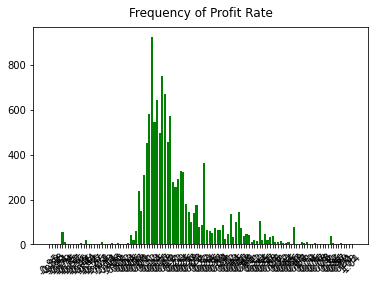

In [ ]:
df1 = df.copy()

# kar oranı:otel tipleri değişse de belirli dönemlerde belirli kar oranı hesaplanır.
# profit rate = profit/purchase
df1['ProfitRate'] = (df1['ListPriceTRY'] - df1['PurchaseAmountTRY']) / df1['PurchaseAmountTRY']


df_ProfitRate = df1.copy()
df_ProfitRate['ProfitRate'] = df_ProfitRate['ProfitRate'].round(2)

labels = np.sort(list(df_ProfitRate.ProfitRate.unique()))
labels = list(map(str,labels))

values = np.array(df_ProfitRate.groupby('ProfitRate')['Unnamed: 0'].nunique())

a = list(zip(labels,values))
labels, values = zip(*a)

print(a)

plt.title('Frequency of Profit Rate', pad=10)
plt.bar(labels, values, color ='green',width = 0.8)
plt.xticks(rotation = 45)
plt.rcParams['figure.figsize'] = [24, 10]
plt.rcParams.update({'font.size': 10})
matplotlib.rc('xtick', labelsize=10)
plt.show()

In [ ]:
# Sales data where the Profit Rate value is outside the range 0 to 1
pd.concat([df1.loc[df1['ProfitRate'] < 0], df1.loc[df1['ProfitRate'] > 1.00]])

,Unnamed: 0,w,SpecialWeek (w),Date,DWHotelID,ListPriceTRY,PurchaseAmountTRY,Aktiviteler,Havuz & Plaj,Tesis Hizmet ve Özellikleri,...,Ortak Alanlar,Yiyecek & İçecek,Spa & Sağlık,Çocuk Aktiviteleri,NightCount_avg,RatingTripA,Year,rooms_old,#rooms,ProfitRate
101,101,3.0,0.0,2018-32,58.0,1587.714286,8322.666667,0.333333,0.371429,0.348837,...,0.411765,0.8125,0.387755,0.285714,4.224701,4.5,2018,2.0,42.0,-0.809230
268,268,0.0,0.0,2019-37,198.0,4325.833333,7738.857143,0.148148,0.257143,0.348837,...,0.058824,0.6875,0.142857,0.190476,4.531189,4.5,2019,2.0,21.0,-0.441024
269,269,0.0,0.0,2019-38,198.0,4325.833333,7738.857143,0.148148,0.257143,0.348837,...,0.058824,0.6875,0.142857,0.190476,4.531189,4.5,2019,2.0,21.0,-0.441024
270,270,0.0,0.0,2021-21,198.0,4325.833333,7738.857143,0.148148,0.257143,0.348837,...,0.058824,0.6875,0.142857,0.190476,4.531189,4.5,2021,2.0,14.0,-0.441024
271,271,0.0,0.0,2021-22,198.0,4325.833333,7738.857143,0.148148,0.257143,0.348837,...,0.058824,0.6875,0.142857,0.190476,4.531189,4.5,2021,2.0,14.0,-0.441024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,3346,3.0,0.0,2014-37,35.0,880.666667,434.666667,0.148148,0.285714,0.488372,...,0.294118,0.4375,0.081633,0.095238,4.000000,4.5,2014,12.0,84.0,1.026074
4284,4284,0.0,0.0,2019-21,76.0,731.250000,358.250000,0.271605,0.200000,0.162791,...,0.058824,0.2500,0.204082,0.190476,2.491358,4.5,2019,6.0,42.0,1.041172
4285,4285,0.0,1.0,2019-22,76.0,731.250000,358.250000,0.271605,0.200000,0.162791,...,0.058824,0.2500,0.204082,0.190476,2.491358,4.5,2019,6.0,42.0,1.041172
4286,4286,4.0,1.0,2019-23,76.0,731.250000,358.250000,0.271605,0.200000,0.162791,...,0.058824,0.2500,0.204082,0.190476,2.491358,4.5,2019,6.0,42.0,1.041172


In [ ]:
# Profit Rate is limited from 0 to 1.
df1 = df1.loc[df1['ProfitRate'] > 0]
df1 = df1.loc[df1['ProfitRate'] < 1.01]

In [ ]:
print(df1.nlargest(15, 'PurchaseAmountTRY')[['PurchaseAmountTRY','ListPriceTRY', 'ProfitRate']])
print("\n\n")
print(df1.nlargest(15, 'ListPriceTRY')[['PurchaseAmountTRY','ListPriceTRY', 'ProfitRate']])

      PurchaseAmountTRY  ListPriceTRY  ProfitRate
9199        8684.000000        8866.0    0.020958
9213        8638.666667        8866.0    0.026316
9214        8638.666667        8866.0    0.026316
9095        8400.000000        8960.0    0.066667
9096        8400.000000        8960.0    0.066667
9170        7830.000000        8430.0    0.076628
9200        7775.500000        8866.0    0.140248
9201        7775.500000        8866.0    0.140248
9202        7775.500000        8866.0    0.140248
9203        7775.500000        8866.0    0.140248
9204        7775.500000        8866.0    0.140248
9205        7775.500000        8866.0    0.140248
9206        7775.500000        8866.0    0.140248
9207        7775.500000        8866.0    0.140248
9208        7775.500000        8866.0    0.140248



      PurchaseAmountTRY  ListPriceTRY  ProfitRate
9095        8400.000000        8960.0    0.066667
9096        8400.000000        8960.0    0.066667
9199        8684.000000        8866.0    0.0209

In [ ]:
df1.loc[df1['ListPriceTRY']>1800]

,Unnamed: 0,w,SpecialWeek (w),Date,DWHotelID,ListPriceTRY,PurchaseAmountTRY,Aktiviteler,Havuz & Plaj,Tesis Hizmet ve Özellikleri,...,Ortak Alanlar,Yiyecek & İçecek,Spa & Sağlık,Çocuk Aktiviteleri,NightCount_avg,RatingTripA,Year,rooms_old,#rooms,ProfitRate
84,84,0.0,0.0,2017-33,58.0,3598.333333,3238.5,0.333333,0.371429,0.348837,...,0.411765,0.8125,0.387755,0.285714,4.224701,4.5,2017,2.0,14.0,0.111111
85,85,0.0,0.0,2017-34,58.0,3598.333333,3238.5,0.333333,0.371429,0.348837,...,0.411765,0.8125,0.387755,0.285714,4.224701,4.5,2017,2.0,14.0,0.111111
86,86,0.0,1.0,2017-35,58.0,3598.333333,3238.5,0.333333,0.371429,0.348837,...,0.411765,0.8125,0.387755,0.285714,4.224701,4.5,2017,2.0,14.0,0.111111
87,87,0.0,1.0,2017-36,58.0,3598.333333,3238.5,0.333333,0.371429,0.348837,...,0.411765,0.8125,0.387755,0.285714,4.224701,4.5,2017,2.0,14.0,0.111111
88,88,0.0,1.0,2017-37,58.0,3598.333333,3238.5,0.333333,0.371429,0.348837,...,0.411765,0.8125,0.387755,0.285714,4.224701,4.5,2017,2.0,14.0,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,11515,0.0,0.0,2021-34,390.0,2099.000000,1805.0,0.074074,0.171429,0.093023,...,0.000000,0.1875,0.081633,0.142857,5.039448,4.0,2021,17.0,119.0,0.162881
11516,11516,0.0,1.0,2021-35,390.0,2099.000000,1805.0,0.074074,0.171429,0.093023,...,0.000000,0.1875,0.081633,0.142857,5.039448,4.0,2021,17.0,119.0,0.162881
11517,11517,0.0,0.0,2021-36,390.0,2099.000000,1805.0,0.074074,0.171429,0.093023,...,0.000000,0.1875,0.081633,0.142857,5.039448,4.0,2021,17.0,119.0,0.162881
11518,11518,0.0,0.0,2021-37,390.0,2099.000000,1805.0,0.074074,0.171429,0.093023,...,0.000000,0.1875,0.081633,0.142857,5.039448,4.0,2021,17.0,119.0,0.162881


In [ ]:
# Limit of List Price is 1800.
df1 = df1.loc[df1['ListPriceTRY']<=1800]

In [ ]:
print(df1.nsmallest(15, 'PurchaseAmountTRY')[['PurchaseAmountTRY','ListPriceTRY', 'ProfitRate']])
print("\n\n")
print(df1.nsmallest(15, 'ListPriceTRY')[['PurchaseAmountTRY','ListPriceTRY', 'ProfitRate']])

       PurchaseAmountTRY  ListPriceTRY  ProfitRate
11288          34.000000     37.666667    0.107843
11249          48.600000     57.000000    0.172840
11271          61.250000     68.375000    0.116327
11303          62.514286     74.685714    0.194698
11233          63.250000     75.937500    0.200593
11268          64.200000     71.700000    0.116822
11269          64.200000     71.700000    0.116822
11283          64.285714     78.714286    0.224444
11284          64.285714     78.714286    0.224444
7274           74.000000    113.000000    0.527027
11252          77.529412     90.647059    0.169196
1387           81.750000    139.750000    0.709480
7287           87.000000    127.500000    0.465517
1317           89.000000     99.000000    0.112360
1318           89.000000     99.000000    0.112360



       PurchaseAmountTRY  ListPriceTRY  ProfitRate
11288          34.000000     37.666667    0.107843
11249          48.600000     57.000000    0.172840
11271          61.250000    

In [ ]:
df1['featureScore'] = df1['Aktiviteler'] + df1['Havuz & Plaj'] +  df1['Spa & Sağlık'] + \
                          df1['Tesis Hizmet ve Özellikleri'] + df1['Yiyecek & İçecek'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#SalesDWDateID	DWHotelID	SalesID	    ListPriceTRYUnit	PurchaseAmountTRYUnit	ProfitRate	#rooms	RoomCount	type__Sehir Oteli	RatingTripA	    catName	    featureScore	OrderHighlights	empty_rooms
#2012-01-06	    2.0	        515099.0	115.500	            99.0000	                0.166667	17.0	2.0	        0.0	                4.1	            2.0	        1.078785	    0.0	            15.0

In [ ]:
hotelrooms = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/sales_v4.csv")
print('Column Names=', list(hotelrooms.columns)) 
hotelrooms = hotelrooms.iloc[:,[0,2,3,42]]
hotelrooms

Column Names= ['SalesID', 'DWSalesItemTypeID', 'DWHotelID', 'CheckInDWDateID', 'CheckOutDWDateID', 'SalesDWDateID', 'SalesCurrencyCode', 'SalesCurrencyRate', 'InvoiceAmountTRY', 'ListPrice', 'GuestCount', 'HasExtraBed', 'RoomCount', 'NightCount', 'PurchaseAmount', 'delayDays', 'ListPriceTRY', 'PurchaseAmountTRY', 'type__Tatil Oteli', 'type__Sehir Oteli', 'ListPriceTRY_mean', 'NightCount_avg', 'Spa & Sağlık', 'ListPriceTRY_max', 'Havuz & Plaj', 'Yiyecek & İçecek', 'delayDays_mean', 'delayDays_max', 'Tesis Hizmet ve Özellikleri', 'Türk Kahvesi', 'Covid Önlemleri', 'Aktiviteler', 'Çocuk Aktiviteleri', 'Count_satis', 'Şişeli İçecekler', 'Mini Kulüp', 'Taze Sıkılmış Meyve Suları', 'ListPriceTRY_min', 'catName__3 Yıldız', 'catName__4 Yıldız', 'catName__5 Yıldız', 'Group', '#rooms']


,SalesID,DWHotelID,CheckInDWDateID,#rooms
0,127088.0,1625.0,2020-10-16,1.0
1,124091.0,1625.0,2020-09-15,1.0
2,126423.0,1625.0,2020-10-10,1.0
3,59893.0,985.0,2019-11-18,7.0
4,3996.0,602.0,2019-07-13,42.0
...,...,...,...,...
128151,213353.0,117.0,2021-12-24,4.0
128152,213623.0,117.0,2021-12-24,4.0
128153,198223.0,234.0,2021-12-25,17.0
128154,220942.0,1429.0,2021-12-25,5.0


In [ ]:
hotelrooms2 = hotelrooms.copy()
hotelrooms2['Date_week'] = pd.DatetimeIndex(hotelrooms2['CheckInDWDateID']).week
hotelrooms2['Date_year'] = pd.DatetimeIndex(hotelrooms2['CheckInDWDateID']).year
hotelrooms2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


,SalesID,DWHotelID,CheckInDWDateID,#rooms,Date_week,Date_year
0,127088.0,1625.0,2020-10-16,1.0,42,2020
1,124091.0,1625.0,2020-09-15,1.0,38,2020
2,126423.0,1625.0,2020-10-10,1.0,41,2020
3,59893.0,985.0,2019-11-18,7.0,47,2019
4,3996.0,602.0,2019-07-13,42.0,28,2019
...,...,...,...,...,...,...
128151,213353.0,117.0,2021-12-24,4.0,51,2021
128152,213623.0,117.0,2021-12-24,4.0,51,2021
128153,198223.0,234.0,2021-12-25,17.0,51,2021
128154,220942.0,1429.0,2021-12-25,5.0,51,2021


In [ ]:
hotelrooms2['#rooms'] = hotelrooms2['#rooms']
hotelrooms3 = hotelrooms2.groupby(['Date_year','Date_week','DWHotelID'])['#rooms'].max().reset_index()
hotelrooms3

,Date_year,Date_week,DWHotelID,#rooms
0,2012,1,2.0,17.0
1,2012,1,3.0,53.0
2,2012,1,13.0,13.0
3,2012,1,17.0,6.0
4,2012,1,21.0,13.0
...,...,...,...,...
37299,2021,51,1429.0,5.0
37300,2021,53,17.0,6.0
37301,2021,53,499.0,5.0
37302,2021,53,650.0,4.0


In [ ]:
df1[['Date_year', 'Date_week']] = df1['Date'].str.split('-', 1, expand=True)

In [ ]:
df1['Date_year']= df1['Date_year'].astype(int)
df1['Date_week']= df1['Date_week'].astype(int)
hotelrooms3['Date_year']= hotelrooms3['Date_year'].astype(int)
hotelrooms3['Date_week']= hotelrooms3['Date_week'].astype(int)

In [ ]:
df1

,Unnamed: 0,w,SpecialWeek (w),Date,DWHotelID,ListPriceTRY,PurchaseAmountTRY,Aktiviteler,Havuz & Plaj,Tesis Hizmet ve Özellikleri,...,Çocuk Aktiviteleri,NightCount_avg,RatingTripA,Year,rooms_old,#rooms,ProfitRate,featureScore,Date_year,Date_week
0,0,10.0,1.0,2013-21,58.0,486.200000,407.300000,0.333333,0.371429,0.348837,...,0.285714,4.224701,4.5,2013,2.0,379.0,0.193715,2.253854,2013,21
1,1,12.0,0.0,2013-22,58.0,805.833333,639.416667,0.333333,0.371429,0.348837,...,0.285714,4.224701,4.5,2013,2.0,379.0,0.260263,2.253854,2013,22
2,2,31.0,0.0,2013-23,58.0,863.870968,691.387097,0.333333,0.371429,0.348837,...,0.285714,4.224701,4.5,2013,2.0,379.0,0.249475,2.253854,2013,23
3,3,58.0,0.0,2013-24,58.0,643.258621,516.724138,0.333333,0.371429,0.348837,...,0.285714,4.224701,4.5,2013,2.0,379.0,0.244878,2.253854,2013,24
4,4,50.0,0.0,2013-25,58.0,1223.840000,988.900000,0.333333,0.371429,0.348837,...,0.285714,4.224701,4.5,2013,2.0,379.0,0.237577,2.253854,2013,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11478,11478,40.0,1.0,2018-33,390.0,940.575000,850.675000,0.074074,0.171429,0.093023,...,0.142857,5.039448,4.0,2018,17.0,119.0,0.105681,0.607659,2018,33
11479,11479,54.0,1.0,2018-34,390.0,682.240741,609.777778,0.074074,0.171429,0.093023,...,0.142857,5.039448,4.0,2018,17.0,119.0,0.118835,0.607659,2018,34
11480,11480,34.0,1.0,2018-35,390.0,953.764706,843.205882,0.074074,0.171429,0.093023,...,0.142857,5.039448,4.0,2018,17.0,119.0,0.131117,0.607659,2018,35
11481,11481,37.0,0.0,2018-36,390.0,823.594595,739.810811,0.074074,0.171429,0.093023,...,0.142857,5.039448,4.0,2018,17.0,119.0,0.113250,0.607659,2018,36


In [ ]:
df2 = df1.iloc[:,[4,0,1,3,5,6,17,21,22,23,24,19,20]]
df2

,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms
0,58.0,0,10.0,2013-21,486.200000,407.300000,4.5,0.193715,2.253854,2013,21,2.0,379.0
1,58.0,1,12.0,2013-22,805.833333,639.416667,4.5,0.260263,2.253854,2013,22,2.0,379.0
2,58.0,2,31.0,2013-23,863.870968,691.387097,4.5,0.249475,2.253854,2013,23,2.0,379.0
3,58.0,3,58.0,2013-24,643.258621,516.724138,4.5,0.244878,2.253854,2013,24,2.0,379.0
4,58.0,4,50.0,2013-25,1223.840000,988.900000,4.5,0.237577,2.253854,2013,25,2.0,379.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11478,390.0,11478,40.0,2018-33,940.575000,850.675000,4.0,0.105681,0.607659,2018,33,17.0,119.0
11479,390.0,11479,54.0,2018-34,682.240741,609.777778,4.0,0.118835,0.607659,2018,34,17.0,119.0
11480,390.0,11480,34.0,2018-35,953.764706,843.205882,4.0,0.131117,0.607659,2018,35,17.0,119.0
11481,390.0,11481,37.0,2018-36,823.594595,739.810811,4.0,0.113250,0.607659,2018,36,17.0,119.0


In [ ]:
df5 = df2.copy()

In [ ]:
df5['Index'] = df5['Unnamed: 0']
df6 = df5.set_index('Index')
df6

,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms
Index,,,,,,,,,,,,,
0,58.0,0,10.0,2013-21,486.200000,407.300000,4.5,0.193715,2.253854,2013,21,2.0,379.0
1,58.0,1,12.0,2013-22,805.833333,639.416667,4.5,0.260263,2.253854,2013,22,2.0,379.0
2,58.0,2,31.0,2013-23,863.870968,691.387097,4.5,0.249475,2.253854,2013,23,2.0,379.0
3,58.0,3,58.0,2013-24,643.258621,516.724138,4.5,0.244878,2.253854,2013,24,2.0,379.0
4,58.0,4,50.0,2013-25,1223.840000,988.900000,4.5,0.237577,2.253854,2013,25,2.0,379.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11478,390.0,11478,40.0,2018-33,940.575000,850.675000,4.0,0.105681,0.607659,2018,33,17.0,119.0
11479,390.0,11479,54.0,2018-34,682.240741,609.777778,4.0,0.118835,0.607659,2018,34,17.0,119.0
11480,390.0,11480,34.0,2018-35,953.764706,843.205882,4.0,0.131117,0.607659,2018,35,17.0,119.0


In [ ]:
df6['empty_rooms'] = df6['#rooms'] - df6['w']+ 1e-3

In [ ]:
df6[df6['empty_rooms']<0]

,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms,empty_rooms
Index,,,,,,,,,,,,,,


In [ ]:
df7= df6[df6['empty_rooms']>= 0]
df7

,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms,empty_rooms
Index,,,,,,,,,,,,,,
0,58.0,0,10.0,2013-21,486.200000,407.300000,4.5,0.193715,2.253854,2013,21,2.0,379.0,369.001
1,58.0,1,12.0,2013-22,805.833333,639.416667,4.5,0.260263,2.253854,2013,22,2.0,379.0,367.001
2,58.0,2,31.0,2013-23,863.870968,691.387097,4.5,0.249475,2.253854,2013,23,2.0,379.0,348.001
3,58.0,3,58.0,2013-24,643.258621,516.724138,4.5,0.244878,2.253854,2013,24,2.0,379.0,321.001
4,58.0,4,50.0,2013-25,1223.840000,988.900000,4.5,0.237577,2.253854,2013,25,2.0,379.0,329.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11478,390.0,11478,40.0,2018-33,940.575000,850.675000,4.0,0.105681,0.607659,2018,33,17.0,119.0,79.001
11479,390.0,11479,54.0,2018-34,682.240741,609.777778,4.0,0.118835,0.607659,2018,34,17.0,119.0,65.001
11480,390.0,11480,34.0,2018-35,953.764706,843.205882,4.0,0.131117,0.607659,2018,35,17.0,119.0,85.001


In [ ]:
df7.to_csv(r'/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/preprocessed_data_v3.csv', index = False)


In [ ]:
df7['rewardrate'] = (df7['ListPriceTRY']-df7['PurchaseAmountTRY'])/ df7['empty_rooms']

[('0.0', 3590), ('3.0', 3303), ('6.0', 872), ('9.0', 413), ('12.0', 150), ('15.0', 110), ('18.0', 53), ('21.0', 46), ('24.0', 17), ('27.0', 18), ('30.0', 7), ('33.0', 9), ('36.0', 9), ('39.0', 6), ('42.0', 5), ('45.0', 10), ('48.0', 2), ('51.0', 3), ('57.0', 4), ('60.0', 1), ('63.0', 2), ('66.0', 2), ('69.0', 1), ('72.0', 2), ('78.0', 2), ('84.0', 2), ('87.0', 1), ('90.0', 2), ('105.0', 1), ('108.0', 1), ('111.0', 4), ('135.0', 1), ('144.0', 1), ('147.0', 1), ('159.0', 1), ('162.0', 1), ('192.0', 1), ('240.0', 1), ('252.0', 1), ('264.0', 1), ('291.0', 1), ('309.0', 1), ('549.0', 1), ('1000.0', 214)]


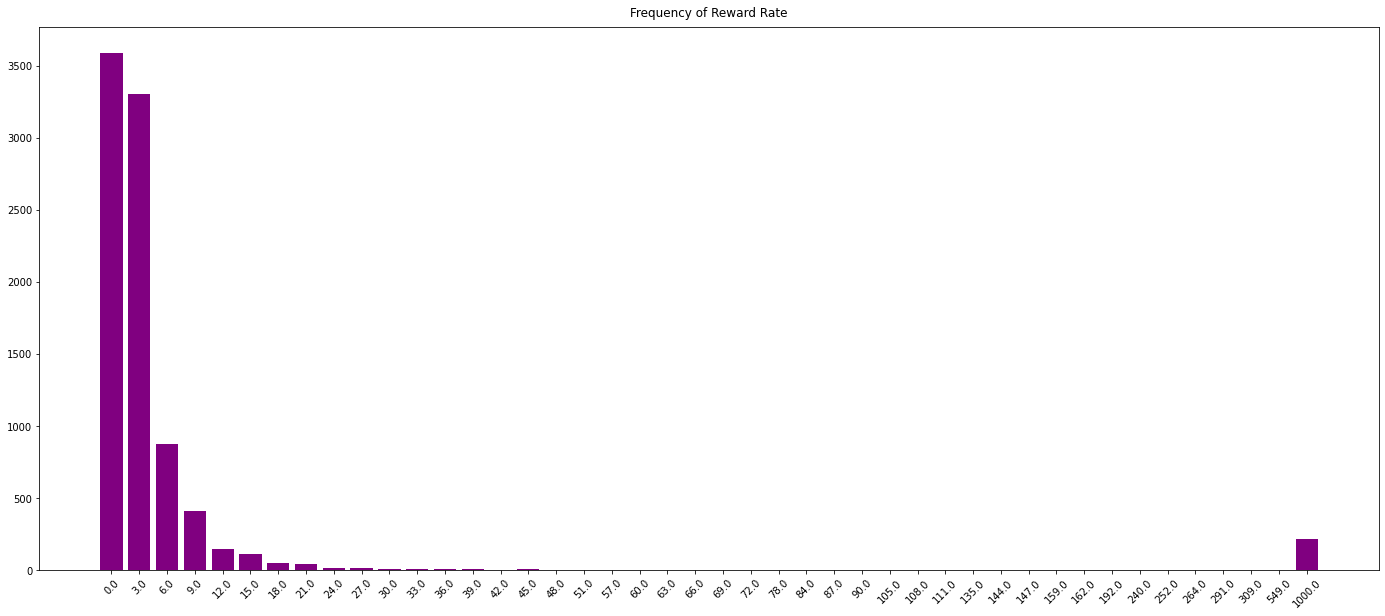

In [ ]:
df_rewardrate = df7.copy()
df_rewardrate['rewardrate'] =  round(3 * round(df_rewardrate['rewardrate']/3),0)


df_rewardrate.loc[df_rewardrate.rewardrate > 650, 'rewardrate'] = 1000

labels = np.sort(list(df_rewardrate.rewardrate.unique()))
labels = list(map(str,labels))

values = np.array(df_rewardrate.groupby('rewardrate')['Unnamed: 0'].nunique())

a = list(zip(labels,values))
labels, values = zip(*a)

print(a)

plt.title('Frequency of Reward Rate', pad=10)
plt.bar(labels, values, color ='purple',width = 0.8)
plt.xticks(rotation = 45)
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams.update({'font.size': 10})
matplotlib.rc('xtick', labelsize=10)
plt.show()


In [ ]:
df22 = df7.copy()
s = []
for i in range(len(df7)-1):
    old = df7.iloc[[i]]
    current = df22.iloc[[i+1]]
    s.append(float((old['ListPriceTRY']-old['PurchaseAmountTRY'])//old['empty_rooms'])-float((current['ListPriceTRY']-current['PurchaseAmountTRY'])/current['empty_rooms']))

  

In [ ]:
s.insert(0, 0)
df22['timestamp'] = s


[('-10000', 213), ('-520', 1), ('-300', 1), ('-250', 1), ('-240', 1), ('-230', 2), ('-180', 1), ('-160', 1), ('-110', 2), ('-100', 5), ('-90', 1), ('-80', 1), ('-70', 2), ('-60', 7), ('-50', 7), ('-40', 4), ('-30', 16), ('-20', 37), ('-10', 258), ('0', 7822), ('10', 193), ('20', 32), ('30', 19), ('40', 8), ('50', 3), ('60', 4), ('70', 2), ('80', 2), ('90', 1), ('100', 2), ('110', 1), ('140', 2), ('160', 2), ('190', 1), ('240', 1), ('250', 1), ('280', 1), ('300', 1), ('550', 1), ('1000', 214)]


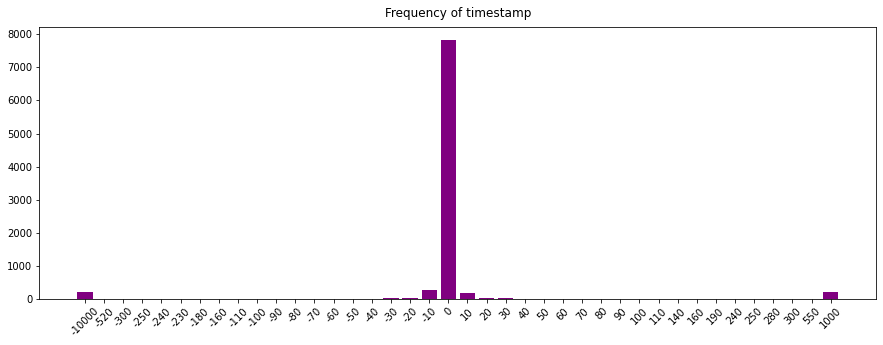

In [ ]:
df_timestamp = df22.copy()
df_timestamp['timestamp'] =  (df_timestamp['timestamp'] / 10).round().astype(int) * 10


df_timestamp.loc[df_timestamp.timestamp < -10000, 'timestamp'] = -10000
df_timestamp.loc[df_timestamp.timestamp > 1000, 'timestamp'] = 1000


labels = np.sort(list(df_timestamp.timestamp.unique()))
labels = list(map(str,labels))

values = np.array(df_timestamp.groupby('timestamp')['Unnamed: 0'].nunique())

a = list(zip(labels,values))
labels, values = zip(*a)

print(a)

plt.title('Frequency of timestamp', pad=10)
plt.bar(labels, values, color ='purple',width = 0.8)
plt.xticks(rotation = 45)
plt.rcParams['figure.figsize'] = [25, 10]
plt.rcParams.update({'font.size': 10})
matplotlib.rc('xtick', labelsize=10)
plt.show()

In [ ]:
df7['DWHotelID'] .nunique()

80

[('0.0', 214), ('1.0', 17), ('2.0', 22), ('3.0', 19), ('4.0', 22), ('5.0', 25), ('6.0', 25), ('7.0', 87), ('8.0', 34), ('9.0', 43), ('10.0', 33), ('11.0', 53), ('12.0', 48), ('13.0', 59), ('14.0', 271), ('15.0', 62), ('16.0', 67), ('17.0', 84), ('18.0', 62), ('19.0', 67), ('20.0', 72), ('21.0', 166), ('22.0', 73), ('23.0', 69), ('24.0', 84), ('25.0', 75), ('26.0', 85), ('27.0', 94), ('28.0', 169), ('29.0', 78), ('30.0', 86), ('31.0', 81), ('32.0', 84), ('33.0', 74), ('34.0', 82), ('35.0', 257), ('36.0', 100), ('37.0', 115), ('38.0', 89), ('39.0', 98), ('40.0', 89), ('41.0', 75), ('42.0', 304), ('43.0', 62), ('44.0', 71), ('45.0', 74), ('46.0', 78), ('47.0', 77), ('48.0', 54), ('49.0', 191), ('50.0', 64), ('51.0', 36), ('52.0', 52), ('53.0', 41), ('54.0', 62), ('55.0', 57), ('56.0', 170), ('57.0', 32), ('58.0', 42), ('59.0', 33), ('60.0', 32), ('61.0', 43), ('62.0', 35), ('63.0', 76), ('64.0', 37), ('65.0', 34), ('66.0', 37), ('67.0', 37), ('68.0', 37), ('69.0', 25), ('70.0', 68), ('71.

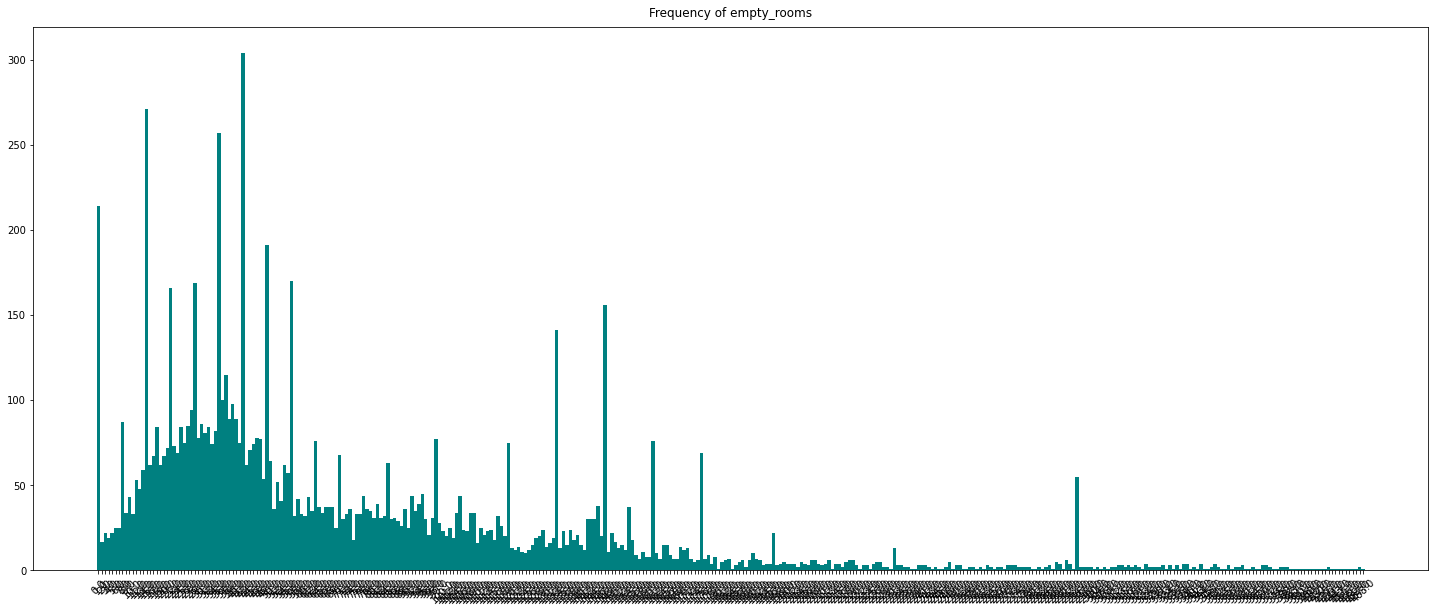

In [ ]:
df_empty_rooms = df7.copy()
df_empty_rooms['empty_rooms'] = df_empty_rooms['empty_rooms']
     
labels = np.sort(list(df_empty_rooms.empty_rooms.unique())).round()
labels = list(map(str,labels))

values = np.array(df_empty_rooms.groupby('empty_rooms')['Unnamed: 0'].nunique())

a = list(zip(labels,values))
labels, values = zip(*a)

print(a)

plt.title('Frequency of empty_rooms', pad=10)
plt.bar(labels, values, color ='teal',width = 1)
plt.xticks(rotation = 45)
plt.rcParams['figure.figsize'] = [250,10]
plt.rcParams.update({'font.size': 10})
matplotlib.rc('xtick', labelsize=8)
plt.show()

###Curiculum learning
Otellerin sıralamasını değiştireceğiz. 
   * En çok satışı olana göre sırala

In [ ]:
df8 = df7.copy()

In [ ]:
df8['Frequency'] = df8.groupby('DWHotelID')['DWHotelID'].transform('count')
df8.sort_values(by=['Frequency','DWHotelID'], inplace=True, ascending=False)


In [ ]:
df8

,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms,empty_rooms,rewardrate,Frequency
Index,,,,,,,,,,,,,,,,
2016,22.0,2016,0.0,2013-21,535.866667,455.066667,4.0,0.177556,1.108866,2013,21,21.0,147.0,147.001,0.549656,144
2017,22.0,2017,0.0,2013-22,535.866667,455.066667,4.0,0.177556,1.108866,2013,22,21.0,147.0,147.001,0.549656,144
2018,22.0,2018,0.0,2013-23,535.866667,455.066667,4.0,0.177556,1.108866,2013,23,21.0,147.0,147.001,0.549656,144
2019,22.0,2019,0.0,2013-24,535.866667,455.066667,4.0,0.177556,1.108866,2013,24,21.0,147.0,147.001,0.549656,144
2020,22.0,2020,0.0,2013-25,535.866667,455.066667,4.0,0.177556,1.108866,2013,25,21.0,147.0,147.001,0.549656,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9720,154.0,9720,50.0,2017-21,1519.180000,1354.960000,4.5,0.121199,0.846329,2017,21,13.0,158.0,108.001,1.520541,17
9721,154.0,9721,40.0,2017-22,1726.225000,1559.475000,4.5,0.106927,0.846329,2017,22,13.0,158.0,118.001,1.413124,17
9722,154.0,9722,52.0,2017-23,1535.173077,1383.288462,4.5,0.109800,0.846329,2017,23,13.0,158.0,106.001,1.432860,17


In [ ]:
df8.to_csv(r'/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/preprocessed_data_v3_sortbysales.csv', index = False)

###Curiculum learning
Otellerin sıralamasını değiştireceğiz. 
   * Otellerin mean-variance ona bakıp fazla variance olanı en sona atalım

In [ ]:
df9 = df7.copy()

In [ ]:
meanx = pd.DataFrame(df9.groupby('DWHotelID').mean()['ProfitRate'])

In [ ]:
meanx['mean_profitrate'] = meanx['ProfitRate']
meanx = meanx.drop(columns=['ProfitRate'])

In [ ]:
df9=df9.merge(meanx, how='left', on='DWHotelID')
df9

,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms,empty_rooms,rewardrate,mean_profitrate
0,58.0,0,10.0,2013-21,486.200000,407.300000,4.5,0.193715,2.253854,2013,21,2.0,379.0,369.001,0.213821,0.152182
1,58.0,1,12.0,2013-22,805.833333,639.416667,4.5,0.260263,2.253854,2013,22,2.0,379.0,367.001,0.453450,0.152182
2,58.0,2,31.0,2013-23,863.870968,691.387097,4.5,0.249475,2.253854,2013,23,2.0,379.0,348.001,0.495642,0.152182
3,58.0,3,58.0,2013-24,643.258621,516.724138,4.5,0.244878,2.253854,2013,24,2.0,379.0,321.001,0.394187,0.152182
4,58.0,4,50.0,2013-25,1223.840000,988.900000,4.5,0.237577,2.253854,2013,25,2.0,379.0,329.001,0.714101,0.152182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8869,390.0,11478,40.0,2018-33,940.575000,850.675000,4.0,0.105681,0.607659,2018,33,17.0,119.0,79.001,1.137960,0.168860
8870,390.0,11479,54.0,2018-34,682.240741,609.777778,4.0,0.118835,0.607659,2018,34,17.0,119.0,65.001,1.114798,0.168860
8871,390.0,11480,34.0,2018-35,953.764706,843.205882,4.0,0.131117,0.607659,2018,35,17.0,119.0,85.001,1.300677,0.168860
8872,390.0,11481,37.0,2018-36,823.594595,739.810811,4.0,0.113250,0.607659,2018,36,17.0,119.0,82.001,1.021741,0.168860


In [ ]:
df9['error_profitrate'] = (df9['ProfitRate'] -df9['mean_profitrate'] )**2
variancex =pd.DataFrame(df9.groupby('DWHotelID').sum()['error_profitrate'])
variancex['variance_profitrate'] = variancex['error_profitrate']/(df9['DWHotelID'].value_counts()-1)
variancex = variancex.drop(columns=['error_profitrate'])

In [ ]:
df9=df9.merge(variancex, how='left', on='DWHotelID')
df9

,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms,empty_rooms,rewardrate,mean_profitrate,error_profitrate,variance_profitrate
0,58.0,0,10.0,2013-21,486.200000,407.300000,4.5,0.193715,2.253854,2013,21,2.0,379.0,369.001,0.213821,0.152182,0.001725,0.004135
1,58.0,1,12.0,2013-22,805.833333,639.416667,4.5,0.260263,2.253854,2013,22,2.0,379.0,367.001,0.453450,0.152182,0.011682,0.004135
2,58.0,2,31.0,2013-23,863.870968,691.387097,4.5,0.249475,2.253854,2013,23,2.0,379.0,348.001,0.495642,0.152182,0.009466,0.004135
3,58.0,3,58.0,2013-24,643.258621,516.724138,4.5,0.244878,2.253854,2013,24,2.0,379.0,321.001,0.394187,0.152182,0.008593,0.004135
4,58.0,4,50.0,2013-25,1223.840000,988.900000,4.5,0.237577,2.253854,2013,25,2.0,379.0,329.001,0.714101,0.152182,0.007292,0.004135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8869,390.0,11478,40.0,2018-33,940.575000,850.675000,4.0,0.105681,0.607659,2018,33,17.0,119.0,79.001,1.137960,0.168860,0.003992,0.001862
8870,390.0,11479,54.0,2018-34,682.240741,609.777778,4.0,0.118835,0.607659,2018,34,17.0,119.0,65.001,1.114798,0.168860,0.002503,0.001862
8871,390.0,11480,34.0,2018-35,953.764706,843.205882,4.0,0.131117,0.607659,2018,35,17.0,119.0,85.001,1.300677,0.168860,0.001425,0.001862
8872,390.0,11481,37.0,2018-36,823.594595,739.810811,4.0,0.113250,0.607659,2018,36,17.0,119.0,82.001,1.021741,0.168860,0.003092,0.001862


In [ ]:
df9.sort_values(by=['variance_profitrate','DWHotelID'], inplace=True, ascending=False)
df9.to_csv(r'/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/preprocessed_data_v3_sortbyvariance_profitrate.csv', index = False)

###Not curiculum
   * Her otel için model ayrı ayrı çalışacak Q-table sıfırlanacak


In [ ]:
df_byhotels = []
for i in df7.DWHotelID.unique():
    df_byhotels.append(df7.loc[df7['DWHotelID']==i])

In [ ]:
np.save('/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/preprocessed_data_v3_groupbyhotels.npy', df_byhotels )

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


###Training Evaluation
   * 113 hafta training, 114.hafta evaluation

In [ ]:
df10 = df7.copy()
df10 = df10[df10['DWHotelID'] !=154.0]
df10 = df10[df10['DWHotelID'] !=157.0]
df10 = df10[df10['DWHotelID'] !=365.0]

In [ ]:
df10 = df10.sort_values(["DWHotelID", "Date"], ascending = (True, True))
last_lines = df10.reset_index().groupby('DWHotelID').Index.last()
last_week = df10.merge(last_lines, how='inner', on='Index')
df10 = df10.drop(last_lines)
last_week

,Index,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms,empty_rooms,rewardrate
0,9358,2.0,9358,53.0,2021-37,1530.245283,1120.320755,3.5,0.365899,1.078785,2021,37,17.0,119.0,66.001,6.210884
1,401,3.0,401,22.0,2019-26,1395.909091,1185.000000,4.5,0.177982,1.963910,2019,26,53.0,371.0,349.001,0.604322
2,11375,6.0,11375,3.0,2021-38,313.666667,253.333333,3.5,0.238158,0.469892,2021,38,4.0,28.0,25.001,2.413237
3,1581,10.0,1581,20.0,2021-36,1637.850000,1089.050000,4.0,0.503925,0.853482,2021,36,1.0,21.0,1.001,548.251748
4,1439,11.0,1439,0.0,2021-38,1522.000000,882.600000,4.5,0.724450,0.674638,2021,38,2.0,14.0,14.001,45.668167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,11087,538.0,11087,13.0,2021-38,1346.153846,961.538462,4.5,0.400000,0.801150,2021,38,25.0,175.0,162.001,2.374154
73,1871,540.0,1871,8.0,2021-38,456.250000,342.000000,3.0,0.334064,0.611310,2021,38,5.0,35.0,27.001,4.231325
74,7907,589.0,7907,2.0,2021-26,918.500000,698.000000,4.5,0.315903,0.643136,2021,26,21.0,147.0,145.001,1.520679
75,863,701.0,863,0.0,2021-38,1469.230769,1186.384615,4.5,0.238410,1.346912,2021,38,5.0,35.0,35.001,8.081088


In [ ]:
df10

,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms,empty_rooms,rewardrate
Index,,,,,,,,,,,,,,,
9216,2.0,9216,3.0,2013-21,265.333333,199.000000,3.5,0.333333,1.078785,2013,21,17.0,119.0,116.001,0.571834
9217,2.0,9217,0.0,2013-22,336.000000,252.000000,3.5,0.333333,1.078785,2013,22,17.0,119.0,119.001,0.705876
9218,2.0,9218,5.0,2013-23,336.000000,252.000000,3.5,0.333333,1.078785,2013,23,17.0,119.0,114.001,0.736836
9219,2.0,9219,3.0,2013-24,846.666667,689.000000,3.5,0.228834,1.078785,2013,24,17.0,119.0,116.001,1.359184
9220,2.0,9220,3.0,2013-25,645.333333,538.000000,3.5,0.199504,1.078785,2013,25,17.0,119.0,116.001,0.925279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,880.0,1265,12.0,2019-26,1401.500000,1091.416667,4.5,0.284111,1.030392,2019,26,2.0,66.0,54.001,5.742178
1267,880.0,1267,29.0,2019-28,1594.034483,1167.655172,4.5,0.365159,1.030392,2019,28,2.0,66.0,37.001,11.523454
1269,880.0,1269,14.0,2019-30,1650.714286,1175.500000,4.5,0.404266,1.030392,2019,30,2.0,66.0,52.001,9.138561


In [ ]:
df10[df10['ProfitRate']>=0.6]

,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms,empty_rooms,rewardrate
Index,,,,,,,,,,,,,,,
1564,10.0,1564,0.0,2019-37,660.000000,376.000000,4.0,0.755319,0.853482,2019,37,1.0,28.0,28.001,10.142495
1565,10.0,1565,0.0,2019-38,660.000000,376.000000,4.0,0.755319,0.853482,2019,38,1.0,28.0,28.001,10.142495
1566,10.0,1566,0.0,2021-21,660.000000,376.000000,4.0,0.755319,0.853482,2021,21,1.0,21.0,21.001,13.523166
1567,10.0,1567,0.0,2021-22,660.000000,376.000000,4.0,0.755319,0.853482,2021,22,1.0,21.0,21.001,13.523166
1568,10.0,1568,0.0,2021-23,660.000000,376.000000,4.0,0.755319,0.853482,2021,23,1.0,21.0,21.001,13.523166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,589.0,7899,5.0,2019-36,1652.000000,865.200000,4.5,0.909385,0.643136,2019,36,21.0,147.0,142.001,5.540806
829,701.0,829,6.0,2019-22,940.000000,517.000000,4.5,0.818182,1.346912,2019,22,5.0,35.0,29.001,14.585704
843,701.0,843,6.0,2019-36,1350.000000,742.500000,4.5,0.818182,1.346912,2019,36,5.0,35.0,29.001,20.947554


In [ ]:
df10.to_csv(r'/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/preprocessed_data_v3_training.csv', index = False)

In [ ]:
last_week.to_csv(r'/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/preprocessed_data_v3_validation.csv', index = False)

###Not curiculum
   * Her otelin ilk haftası diye otel sıralamasını değiştir



In [ ]:
df_byweeks = []
for i in df7.Date.unique():
    df_byweeks.append(df7.loc[df7['Date']==i])  

In [ ]:
np.save('/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/preprocessed_data_v3_groupbyweeks.npy', df_byweeks )

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


# K-Means + Training Evaluation


In [ ]:
hotel_clusters = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/hotel_clusters_kmeans_4.csv")
hotel_clusters_embedding = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/hotel_clusters_kmeans_4_embedding.csv")
hotel_clusters_embedding["Cluster_Embedding"] = hotel_clusters_embedding["Cluster"]
hotel_clusters = pd.merge(hotel_clusters, hotel_clusters_embedding, on="DWHotelID")[["DWHotelID","Cluster_x","Cluster_Embedding"]]

In [ ]:
df12 = df7.copy()
df12 = df12[df12['DWHotelID'] !=154.0]
df12 = df12[df12['DWHotelID'] !=157.0]
df12 = df12[df12['DWHotelID'] !=365.0]
df12 = pd.merge(df12, hotel_clusters, on="DWHotelID")

In [ ]:
df11 = df12.sort_values(["DWHotelID", "Date"], ascending = (True, True))
df11 = df11.reset_index()
last_lines_2 = df11.groupby('DWHotelID').index.last()
last_week_2 = df11.merge(last_lines_2, how='inner', on='index')
df11 = df11.drop(last_lines_2)
last_week_2

,index,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms,empty_rooms,rewardrate,Cluster_x,Cluster_Embedding
0,7092,2.0,9358,53.0,2021-37,1530.245283,1120.320755,3.5,0.365899,1.078785,2021,37,17.0,119.0,66.001,6.210884,1,3
1,276,3.0,401,22.0,2019-26,1395.909091,1185.000000,4.5,0.177982,1.963910,2019,26,53.0,371.0,349.001,0.604322,0,1
2,8651,6.0,11375,3.0,2021-38,313.666667,253.333333,3.5,0.238158,0.469892,2021,38,4.0,28.0,25.001,2.413237,1,3
3,1240,10.0,1581,20.0,2021-36,1637.850000,1089.050000,4.0,0.503925,0.853482,2021,36,1.0,21.0,1.001,548.251748,1,3
4,1106,11.0,1439,0.0,2021-38,1522.000000,882.600000,4.5,0.724450,0.674638,2021,38,2.0,14.0,14.001,45.668167,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,8399,538.0,11087,13.0,2021-38,1346.153846,961.538462,4.5,0.400000,0.801150,2021,38,25.0,175.0,162.001,2.374154,1,3
73,1376,540.0,1871,8.0,2021-38,456.250000,342.000000,3.0,0.334064,0.611310,2021,38,5.0,35.0,27.001,4.231325,1,3
74,6114,589.0,7907,2.0,2021-26,918.500000,698.000000,4.5,0.315903,0.643136,2021,26,21.0,147.0,145.001,1.520679,1,3
75,621,701.0,863,0.0,2021-38,1469.230769,1186.384615,4.5,0.238410,1.346912,2021,38,5.0,35.0,35.001,8.081088,1,1


In [ ]:
df_byclusters_train = []
df_byclusters_val = []
for i in df11.Cluster_x.unique():
    df_byclusters_train.append(df11.loc[df11['Cluster_x']==i])
    df_byclusters_val.append(last_week_2.loc[last_week_2['Cluster_x']==i])

In [ ]:
df_byclusters_embed_train = []
df_byclusters_embed_val = []
for i in df11.Cluster_Embedding.unique():
    df_byclusters_embed_train.append(df11.loc[df11['Cluster_Embedding']==i])
    df_byclusters_embed_val.append(last_week_2.loc[last_week_2['Cluster_Embedding']==i])
    

In [ ]:
np.save('/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/df_byclusters_train.npy', df_byclusters_train)
np.save('/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/df_byclusters_val.npy', df_byclusters_val  )
np.save('/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/df_byclusters_embed_train.npy', df_byclusters_embed_train )
np.save('/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/df_byclusters_embed_val.npy',df_byclusters_embed_val)


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


# Test Verisi 2021 Temmuz , 2021 Ağustos 3.hafta, 2021 Eylül 4.hafta


In [ ]:
df13 = df7.copy()
df13 = df13[df13['DWHotelID'] !=154.0]
df13 = df13[df13['DWHotelID'] !=157.0]
df13 = df13[df13['DWHotelID'] !=365.0]
df13.shape


(8759, 15)

In [ ]:
searchfortemmuz     = ['28', '29', '30']
searchforagustos    = ['31', '32', '33', '34']
searchforeylul      = ['35', '36', '37', '38']
df_temmuz = df13[df13["Date"].str.contains('|'.join(searchfortemmuz))]
df_agustos = df13[df13["Date"].str.contains('|'.join(searchforagustos))]
df_eylul = df13[df13["Date"].str.contains('|'.join(searchforeylul ))]


In [ ]:
df_temmuz = df_temmuz.sort_values(["DWHotelID", "Date"], ascending = (True, True))
df_temmuz = df_temmuz.reset_index()
testhotelIDs_temmuz = df_temmuz.groupby('DWHotelID').Index.last()
df_test_temmuz= df_temmuz.merge(testhotelIDs_temmuz , how='inner', on='Index')
df13_temmuz = df13.drop(testhotelIDs_temmuz)
df_test_temmuz 


,Index,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms,empty_rooms,rewardrate
0,9333,2.0,9333,48.0,2019-30,1723.666667,1217.395833,3.5,0.415864,1.078785,2019,30,17.0,132.0,84.001,6.026962
1,385,3.0,385,74.0,2018-28,1733.554054,1334.675676,4.5,0.298858,1.963910,2018,28,53.0,371.0,297.001,1.343020
2,11367,6.0,11367,0.0,2021-30,313.666667,253.333333,3.5,0.238158,0.469892,2021,30,4.0,28.0,28.001,2.154685
3,1575,10.0,1575,0.0,2021-30,1131.428571,763.714286,4.0,0.481481,0.853482,2021,30,1.0,21.0,21.001,17.509370
4,1430,11.0,1430,12.0,2021-29,1256.250000,728.583333,4.5,0.724237,0.674638,2021,29,2.0,14.0,2.001,263.701483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,11060,538.0,11060,14.0,2019-29,983.357143,777.928571,4.5,0.264071,0.801150,2019,29,25.0,175.0,161.001,1.275946
73,1845,540.0,1845,8.0,2019-30,1293.500000,970.250000,3.0,0.333162,0.611310,2019,30,5.0,42.0,34.001,9.507073
74,7893,589.0,7893,37.0,2019-30,1602.567568,1214.054054,4.5,0.320013,0.643136,2019,30,21.0,147.0,110.001,3.531909
75,837,701.0,837,13.0,2019-30,1028.384615,911.538462,4.5,0.128186,1.346912,2019,30,5.0,35.0,22.001,5.310947


In [ ]:
df_agustos = df_agustos.sort_values(["DWHotelID", "Date"], ascending = (True, True))
df_agustos = df_agustos.reset_index()
testhotelIDs_agustos = df_agustos.groupby('DWHotelID').Index.last()
df_test_agustos = df_agustos.merge(testhotelIDs_agustos , how='inner', on='Index')
df13_agustos= df13.drop(testhotelIDs_agustos)
df_test_agustos 

,Index,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms,empty_rooms,rewardrate
0,9337,2.0,9337,78.0,2019-34,1238.500000,846.833333,3.5,0.462507,1.078785,2019,34,17.0,132.0,54.001,7.252952
1,373,3.0,373,137.0,2017-34,1365.306569,1132.467153,4.5,0.205604,1.963910,2017,34,53.0,371.0,234.001,0.995036
2,11371,6.0,11371,0.0,2021-34,313.666667,253.333333,3.5,0.238158,0.469892,2021,34,4.0,28.0,28.001,2.154685
3,1577,10.0,1577,7.0,2021-32,1131.428571,763.714286,4.0,0.481481,0.853482,2021,32,1.0,21.0,14.001,26.263430
4,1435,11.0,1435,0.0,2021-34,1522.000000,882.600000,4.5,0.724450,0.674638,2021,34,2.0,14.0,14.001,45.668167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,11083,538.0,11083,38.0,2021-34,1465.473684,1047.657895,4.5,0.398809,0.801150,2021,34,25.0,175.0,137.001,3.049728
73,1866,540.0,1866,14.0,2021-33,1153.928571,865.428571,3.0,0.333361,0.611310,2021,33,5.0,35.0,21.001,13.737441
74,7897,589.0,7897,50.0,2019-34,1269.320000,971.140000,4.5,0.307041,0.643136,2019,34,21.0,147.0,97.001,3.073989
75,859,701.0,859,0.0,2021-34,1537.500000,1241.500000,4.5,0.238421,1.346912,2021,34,5.0,35.0,35.001,8.456901


In [ ]:
df_eylul = df_eylul.sort_values(["DWHotelID", "Date"], ascending = (True, True))
df_eylul = df_eylul.reset_index()
testhotelIDs_eylul= df_eylul.groupby('DWHotelID').Index.last()
df_test_eylul = df_eylul.merge(testhotelIDs_eylul , how='inner', on='Index')
df13_eylul= df13.drop(testhotelIDs_eylul)
df_test_eylul 

,Index,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms,empty_rooms,rewardrate
0,9358,2.0,9358,53.0,2021-37,1530.245283,1120.320755,3.5,0.365899,1.078785,2021,37,17.0,119.0,66.001,6.210884
1,395,3.0,395,104.0,2018-38,980.278846,863.634615,4.5,0.135062,1.963910,2018,38,53.0,371.0,267.001,0.436868
2,11375,6.0,11375,3.0,2021-38,313.666667,253.333333,3.5,0.238158,0.469892,2021,38,4.0,28.0,25.001,2.413237
3,1581,10.0,1581,20.0,2021-36,1637.850000,1089.050000,4.0,0.503925,0.853482,2021,36,1.0,21.0,1.001,548.251748
4,1439,11.0,1439,0.0,2021-38,1522.000000,882.600000,4.5,0.724450,0.674638,2021,38,2.0,14.0,14.001,45.668167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,11087,538.0,11087,13.0,2021-38,1346.153846,961.538462,4.5,0.400000,0.801150,2021,38,25.0,175.0,162.001,2.374154
73,1871,540.0,1871,8.0,2021-38,456.250000,342.000000,3.0,0.334064,0.611310,2021,38,5.0,35.0,27.001,4.231325
74,7901,589.0,7901,0.0,2019-38,1720.000000,1376.000000,4.5,0.250000,0.643136,2019,38,21.0,147.0,147.001,2.340120
75,863,701.0,863,0.0,2021-38,1469.230769,1186.384615,4.5,0.238410,1.346912,2021,38,5.0,35.0,35.001,8.081088


In [ ]:
df13_eylul

,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms,empty_rooms,rewardrate
Index,,,,,,,,,,,,,,,
0,58.0,0,10.0,2013-21,486.200000,407.300000,4.5,0.193715,2.253854,2013,21,2.0,379.0,369.001,0.213821
1,58.0,1,12.0,2013-22,805.833333,639.416667,4.5,0.260263,2.253854,2013,22,2.0,379.0,367.001,0.453450
2,58.0,2,31.0,2013-23,863.870968,691.387097,4.5,0.249475,2.253854,2013,23,2.0,379.0,348.001,0.495642
3,58.0,3,58.0,2013-24,643.258621,516.724138,4.5,0.244878,2.253854,2013,24,2.0,379.0,321.001,0.394187
4,58.0,4,50.0,2013-25,1223.840000,988.900000,4.5,0.237577,2.253854,2013,25,2.0,379.0,329.001,0.714101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,390.0,11477,100.0,2018-32,660.010000,574.820000,4.0,0.148203,0.607659,2018,32,17.0,119.0,19.001,4.483448
11478,390.0,11478,40.0,2018-33,940.575000,850.675000,4.0,0.105681,0.607659,2018,33,17.0,119.0,79.001,1.137960
11479,390.0,11479,54.0,2018-34,682.240741,609.777778,4.0,0.118835,0.607659,2018,34,17.0,119.0,65.001,1.114798


In [ ]:
df13_list = []
df13_list.append(df13_temmuz)
df13_list.append(df13_agustos)
df13_list.append(df13_eylul)

df13_test_list = []
df13_test_list.append(df_test_temmuz)
df13_test_list.append(df_test_agustos)
df13_test_list.append(df_test_eylul)

,DWHotelID,Unnamed: 0,w,Date,ListPriceTRY,PurchaseAmountTRY,RatingTripA,ProfitRate,featureScore,Date_year,Date_week,rooms_old,#rooms,empty_rooms,rewardrate
Index,,,,,,,,,,,,,,,
0,58.0,0,10.0,2013-21,486.200000,407.300000,4.5,0.193715,2.253854,2013,21,2.0,379.0,369.001,0.213821
1,58.0,1,12.0,2013-22,805.833333,639.416667,4.5,0.260263,2.253854,2013,22,2.0,379.0,367.001,0.453450
2,58.0,2,31.0,2013-23,863.870968,691.387097,4.5,0.249475,2.253854,2013,23,2.0,379.0,348.001,0.495642
3,58.0,3,58.0,2013-24,643.258621,516.724138,4.5,0.244878,2.253854,2013,24,2.0,379.0,321.001,0.394187
4,58.0,4,50.0,2013-25,1223.840000,988.900000,4.5,0.237577,2.253854,2013,25,2.0,379.0,329.001,0.714101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11478,390.0,11478,40.0,2018-33,940.575000,850.675000,4.0,0.105681,0.607659,2018,33,17.0,119.0,79.001,1.137960
11479,390.0,11479,54.0,2018-34,682.240741,609.777778,4.0,0.118835,0.607659,2018,34,17.0,119.0,65.001,1.114798
11480,390.0,11480,34.0,2018-35,953.764706,843.205882,4.0,0.131117,0.607659,2018,35,17.0,119.0,85.001,1.300677


In [ ]:
np.save('/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/df_training_tae.npy', df13_list )
np.save('/content/drive/My Drive/Colab Notebooks/dynamic_pricing/data/df_test_tae.npy', df13_test_list)


In [ ]:
df_test_temmuz.columns

Index(['Index', 'DWHotelID', 'Unnamed: 0', 'w', 'Date', 'ListPriceTRY',
       'PurchaseAmountTRY', 'RatingTripA', 'ProfitRate', 'featureScore',
       'Date_year', 'Date_week', 'rooms_old', '#rooms', 'empty_rooms',
       'rewardrate'],
      dtype='object')